# EDA

## Load libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [6]:
df_hexa = pd.read_csv('../others/Levantamiento de Información/Caracterización de hexagonos de La Paz.csv')
df_hexa.head()

,h3_address,lon.centroid,lat.centroid,area.m2,area.km2,media.boletas.mes,media.clientes.mes,media.suma.cajas.mes,Cantidad.ventas,suma.cajas,media.cajas.por.venta,Total.clientes,media.cajas.cliente
0,89b3218a69bffff,-68.030844,-16.577684,111550.134970,0.111550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,89b3218b003ffff,-68.073169,-16.608993,111596.259373,0.111596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,89b3218b007ffff,-68.070413,-16.610737,111590.812619,0.111591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89b3218b017ffff,-68.070192,-16.607459,111592.591714,0.111593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,89b3218b023ffff,-68.067879,-16.615759,111583.584631,0.111584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Segments Analysis

In [7]:
df_hexa.columns

Index(['h3_address', 'lon.centroid', 'lat.centroid', 'area.m2', 'area.km2',
       'media.boletas.mes', 'media.clientes.mes', 'media.suma.cajas.mes',
       'Cantidad.ventas', 'suma.cajas', 'media.cajas.por.venta',
       'Total.clientes', 'media.cajas.cliente'],
      dtype='object')

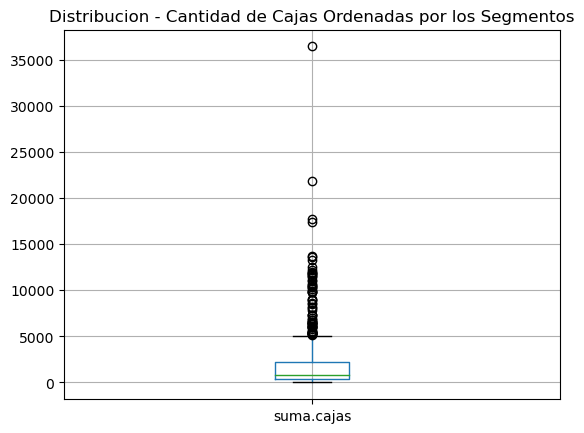

In [8]:
df_totalCajas = df_hexa[['suma.cajas']].copy()
df_totalCajas.boxplot()
plt.title("Distribucion - Cantidad de Cajas Ordenadas por los Segmentos")
plt.show()

Verificamos que los segmentos con zero-cajas no tiengan clientes.

In [10]:
print(" Cantidad de segmentos sin cajas con clientes: %s" %len(df_hexa[df_hexa['suma.cajas'].isnull() & df_hexa['Total.clientes']!=0]))

 Cantidad de segmentos sin cajas con clientes: 0


Sacamos todos los NA y Zeros del dataframe (no son importantes para el estudi)

In [11]:
print("Count Original %s " %(len(df_hexa)))
df_noZeros = df_hexa[(df_hexa['suma.cajas'].notna()) & (df_hexa['suma.cajas']!=0)]
print("Count After CleanUp %s " %(len(df_noZeros)))

Count Original 881 
Count After CleanUp 695 


Vemos de nuevo el boxplot

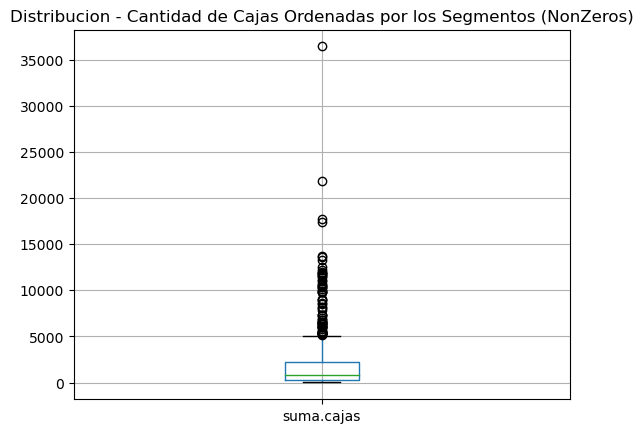

In [13]:
df_noZeros[['suma.cajas']].boxplot()
plt.title("Distribucion - Cantidad de Cajas Ordenadas por los Segmentos (NonZeros)")
plt.show()

In [14]:
# cuandos clientes tienen 0 cajas como pedido, <100, <500, <1000 y >=1000
df_noZeros['category'] = df_noZeros["suma.cajas"].apply(lambda x:
    "0" if x==0 or pd.isnull(x)
        else ("<100" if x<100
                    else ("<500" if x<500
                                else ("<1000" if x<1000 else ">1000"))))

In [15]:
df_noZeros[['h3_address','category']].groupby("category").agg([np.count_nonzero])

,h3_address
,count_nonzero
category,
<100,63
<1000,132
<500,181
>1000,319


       Cantidad.ventas    suma.cajas  Total.clientes
count       695.000000    695.000000      695.000000
mean        275.843165   1949.153957       13.792806
std         287.792352   3036.120996       13.622756
min           1.000000      3.000000        1.000000
25%          82.000000    324.500000        4.000000
50%         180.000000    867.000000        9.000000
75%         393.500000   2226.000000       19.000000
max        3081.000000  36441.000000      124.000000


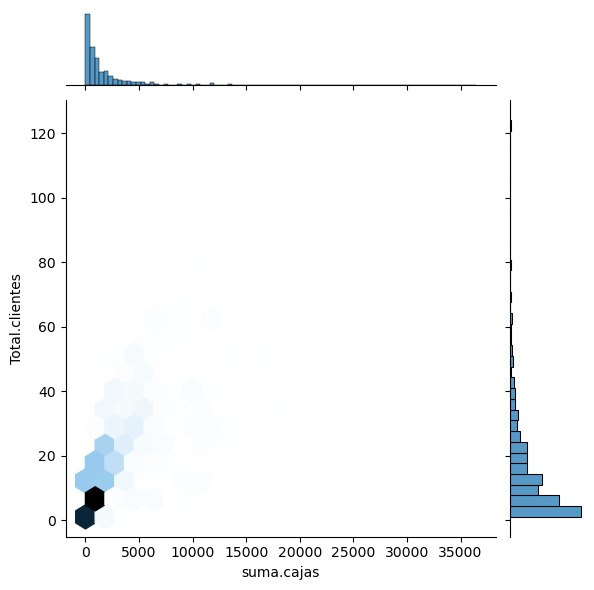

In [37]:
columnasSeleccionadas = ['h3_address','Cantidad.ventas','suma.cajas','Total.clientes','category']
df_noZeros = df_noZeros[columnasSeleccionadas]
print(df_noZeros.describe())
sns.jointplot(x='suma.cajas', y='Total.clientes', data=df_noZeros, kind='hex',
              gridsize=20)
plt.show()

Preocupacion: Segmentos con menor a 100 cajas ordenadas

In [38]:
df_100orLess = df_noZeros[df_noZeros['suma.cajas']<=100].copy()
print("Cantidad de Segmentos con pedidos de 100 cajas o menos: %s" %(len(df_100orLess)))
print("Cantidad de clientes: %s" %(df_100orLess['Total.clientes'].sum()))

Cantidad de Segmentos con pedidos de 100 cajas o menos: 63
Cantidad de clientes: 97.0


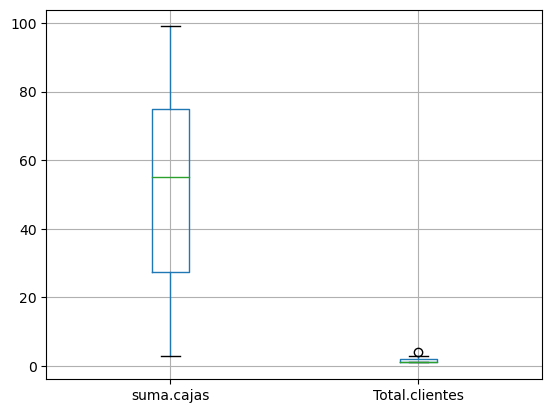

In [39]:
df_100orLess[['suma.cajas','Total.clientes']].boxplot()
plt.show()

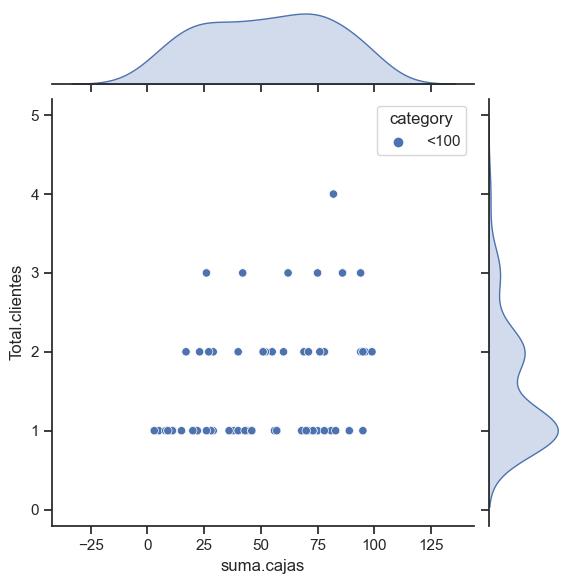

promedio de clientes de categoria <100: 1.5396825396825398


In [52]:
sns.set_theme(style="ticks")
sns.jointplot(x='suma.cajas', y='Total.clientes', data=df_100orLess, hue='category')
plt.show()

print("promedio de clientes de categoria <100: %s" %(df_100orLess['Total.clientes'].mean()))

### Miremos los clientes / paradas por Segmento

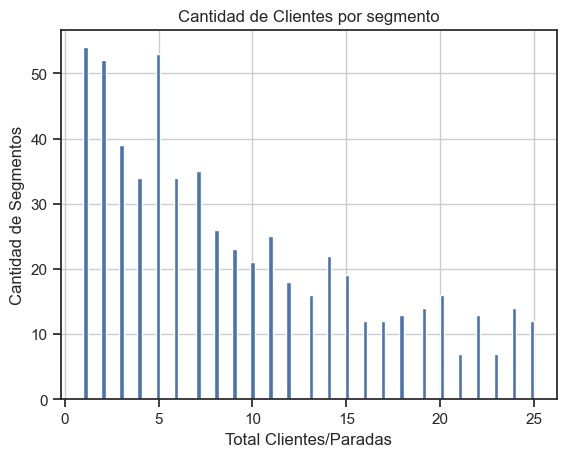

Cantidad de Segmentos con menos de 25 clientes/paradas: 591


In [68]:
limite = 25
df_noZeros[df_noZeros['Total.clientes']<=limite]['Total.clientes'].hist(bins=100)
plt.title("Cantidad de Clientes por segmento")
plt.xlabel("Total Clientes/Paradas")
plt.ylabel("Cantidad de Segmentos")
plt.show()

print("Cantidad de Segmentos con menos de %s clientes/paradas: %s"  %(limite, len(df_noZeros[df_noZeros['Total.clientes']<=limite]['Total.clientes'])))